## Preprocessing

In [1]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 6.8 MB/s eta 0:00:00


In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf
import sklearn as skl

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("/content/Data/cardio_data_processed.csv")
application_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1
68201,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2
68202,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2
68203,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1


In [3]:
# Drop the non-beneficial columns
application_df.drop(columns=['id', 'age', 'bp_category'], axis=1, inplace = True)

In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

gender                    2
height                  106
weight                  278
ap_hi                    86
ap_lo                    58
cholesterol               3
gluc                      3
smoke                     2
alco                      2
active                    2
cardio                    2
age_years                28
bmi                    3738
bp_category_encoded       4
dtype: int64

In [5]:
# Finding the max for each column
maximum = application_df.max()
print(maximum)

gender                          2
height                        250
weight                      200.0
ap_hi                         180
ap_lo                         120
cholesterol                     3
gluc                            3
smoke                           1
alco                            1
active                          1
cardio                          1
age_years                      64
bmi                    298.666667
bp_category_encoded        Normal
dtype: object


In [6]:
# Finding the min for each column
minimum = application_df.min()
print(minimum)

gender                        1
height                       55
weight                     11.0
ap_hi                        90
ap_lo                        60
cholesterol                   1
gluc                          1
smoke                         0
alco                          0
active                        0
cardio                        0
age_years                    29
bmi                    3.471784
bp_category_encoded    Elevated
dtype: object


In [7]:
# Looking at the data type for each column
application_df.dtypes

gender                   int64
height                   int64
weight                 float64
ap_hi                    int64
ap_lo                    int64
cholesterol              int64
gluc                     int64
smoke                    int64
alco                     int64
active                   int64
cardio                   int64
age_years                int64
bmi                    float64
bp_category_encoded     object
dtype: object

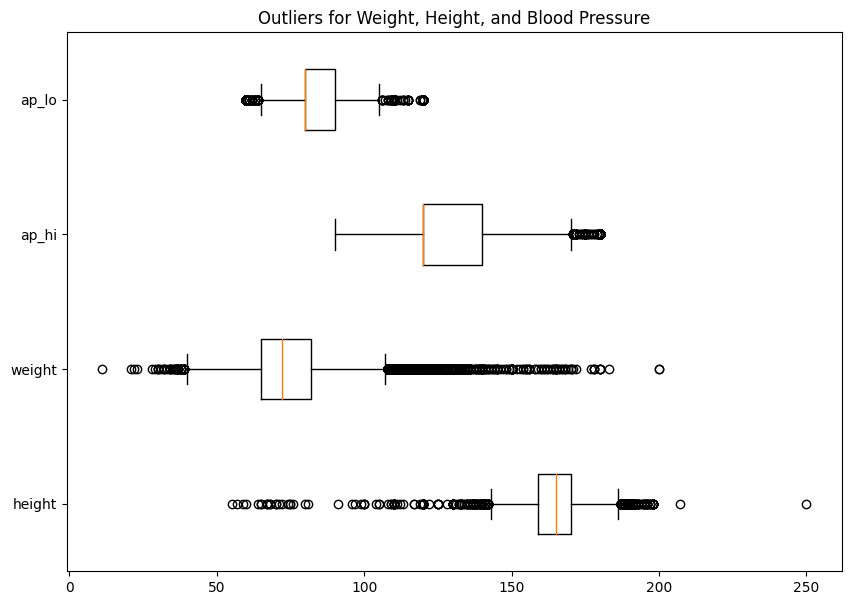

In [8]:
import matplotlib.pyplot as plt
# Checking for outliers
height_data = application_df['height']
weight_data = application_df['weight']
api_hi = application_df['ap_hi']
api_lo = application_df['ap_lo']
data = [height_data, weight_data, api_hi, api_lo]
fig = plt.figure(figsize = (10, 7))
plt.boxplot(data, labels = ['height', 'weight', 'ap_hi', 'ap_lo'], vert = False)
plt.title('Outliers for Weight, Height, and Blood Pressure')
plt.show()

In [9]:
# Calculate outliers for height
quartiles =height_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of height is: {lowerq}")
print(f"The upper quartile of height is: {upperq}")
print(f"The interquartile range of height is: {iqr}")
print(f"The the median of height is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of height is: 159.0
The upper quartile of height is: 170.0
The interquartile range of height is: 11.0
The the median of height is: 165.0 
Values below 142.5 could be outliers.
Values above 186.5 could be outliers.


In [10]:
# Eliminate outliers from the data for height
application_df = application_df.loc[(application_df['height']>142) & (application_df['height']<187),:]
application_df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1
68201,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2
68202,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2
68203,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1


In [11]:
# Calculate outliers for weight
quartiles =weight_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of weight is: {lowerq}")
print(f"The upper quartile of weight is: {upperq}")
print(f"The interquartile range of weight is: {iqr}")
print(f"The the median of weight is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of weight is: 65.0
The upper quartile of weight is: 82.0
The interquartile range of weight is: 17.0
The the median of weight is: 72.0 
Values below 39.5 could be outliers.
Values above 107.5 could be outliers.


In [12]:
# Removing weight outliers
application_df = application_df.loc[(application_df['weight']>39) & (application_df['weight']<108),:]
application_df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68199,1,165,80.0,150,80,1,1,0,0,1,1,57,29.384757,Hypertension Stage 1
68200,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1
68202,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2
68203,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1


In [13]:
# Calculate outliers for Systolic blood pressure (ap_hi)
quartiles = api_hi.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of systolic blood pressure is: {lowerq}")
print(f"The upper quartile of systolic blood pressure is: {upperq}")
print(f"The interquartile range of systolic blood pressure is: {iqr}")
print(f"The the median of systolic blood pressure is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of systolic blood pressure is: 120.0
The upper quartile of systolic blood pressure is: 140.0
The interquartile range of systolic blood pressure is: 20.0
The the median of systolic blood pressure is: 120.0 
Values below 90.0 could be outliers.
Values above 170.0 could be outliers.


In [14]:
application_df = application_df.loc[(application_df['ap_hi']>89.5) & (application_df['ap_hi']<170.5),:]
application_df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68198,1,172,70.0,130,90,1,1,0,0,1,1,53,23.661439,Hypertension Stage 1
68199,1,165,80.0,150,80,1,1,0,0,1,1,57,29.384757,Hypertension Stage 1
68200,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1
68203,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1


In [15]:
# Calculate outliers for Diastolic blood pressuree (ap_lo)
quartiles = api_lo.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of diastolic blood pressure is: {lowerq}")
print(f"The upper quartile of diastolic blood pressure is: {upperq}")
print(f"The interquartile range of diastolic blood pressure is: {iqr}")
print(f"The the median of diastolic blood pressure is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of diastolic blood pressure is: 80.0
The upper quartile of diastolic blood pressure is: 90.0
The interquartile range of diastolic blood pressure is: 10.0
The the median of diastolic blood pressure is: 80.0 
Values below 65.0 could be outliers.
Values above 105.0 could be outliers.


In [16]:
application_df = application_df.loc[(application_df['ap_lo']>64.5) & (application_df['ap_lo']<105.5),:]
application_df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
5,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,Hypertension Stage 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68198,1,172,70.0,130,90,1,1,0,0,1,1,53,23.661439,Hypertension Stage 1
68199,1,165,80.0,150,80,1,1,0,0,1,1,57,29.384757,Hypertension Stage 1
68200,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1
68203,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1


In [17]:
# Delete height and weight column as they are no longer needed
application_df = application_df.drop(columns = ['height', 'weight', 'ap_hi', 'ap_lo'])
application_df

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
0,2,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
5,1,2,2,0,0,0,0,60,29.384676,Hypertension Stage 1
...,...,...,...,...,...,...,...,...,...,...
68198,1,1,1,0,0,1,1,53,23.661439,Hypertension Stage 1
68199,1,1,1,0,0,1,1,57,29.384757,Hypertension Stage 1
68200,2,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1
68203,1,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1


In [18]:
# Looking at the updated minimum for bmi
minimum = application_df.min()
print(minimum)

gender                         1
cholesterol                    1
gluc                           1
smoke                          0
alco                           0
active                         0
cardio                         0
age_years                     29
bmi                    13.520822
bp_category_encoded     Elevated
dtype: object


In [19]:
# Looking at the updated minimum for bmi
maximum = application_df.max()
print(maximum)

gender                         2
cholesterol                    3
gluc                           3
smoke                          1
alco                           1
active                         1
cardio                         1
age_years                     64
bmi                    50.891795
bp_category_encoded       Normal
dtype: object


In [20]:
# Transform pb_category_encoded column using get dummies
bp_category_df = pd.get_dummies(application_df['bp_category_encoded'])
bp_category_df.head(5)

,Elevated,Hypertension Stage 1,Hypertension Stage 2,Normal
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
5,0,1,0,0


In [21]:
# Concatenate bp_category_df and application_df DataFrame
application_df = pd.concat([application_df, bp_category_df], axis=1)
# Drop the original bp_category_encoded column
application_df = application_df.drop(columns=['bp_category_encoded'])
# Display DataFrame
application_df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,Elevated,Hypertension Stage 1,Hypertension Stage 2,Normal
0,2,1,1,0,0,1,0,50,21.967120,0,1,0,0
1,1,3,1,0,0,1,1,55,34.927679,0,0,1,0
2,1,3,1,0,0,0,1,51,23.507805,0,1,0,0
3,2,1,1,0,0,1,1,48,28.710479,0,0,1,0
5,1,2,2,0,0,0,0,60,29.384676,0,1,0,0


In [22]:
# Encoding bmi column using a custom function
def encode_bmi(bmi):
  # This function encodes bmi by setting underweight as 0, healthy weight as 1, overweight as 2, obesity as 3, very obesity 4, and severe obesity as 5
  if bmi < 18.5:
    return 0
  elif bmi <25:
    return 1
  elif bmi < 30:
    return 2
  elif bmi < 35:
    return 3
  elif bmi < 40:
    return 4
  else:
    return 5

# Call the encode bmi function on the bmi column
application_df['bmi'] = application_df['bmi'].apply(encode_bmi)

# Review DataFrame
application_df.head()




,gender,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,Elevated,Hypertension Stage 1,Hypertension Stage 2,Normal
0,2,1,1,0,0,1,0,50,1,0,1,0,0
1,1,3,1,0,0,1,1,55,3,0,0,1,0
2,1,3,1,0,0,0,1,51,1,0,1,0,0
3,2,1,1,0,0,1,1,48,2,0,0,1,0
5,1,2,2,0,0,0,0,60,2,0,1,0,0


In [23]:
# Encoding age column using a custom function
def encode_age(age):
  # This function encodes age by setting 35 years and under as 0, 35-39 years as 1, 40-44 years as 2, 45-49 years as 3,
  # 50-54 years as 4, 55-59 years as 5, 60+ years as 6
  if age <35:
    return 0
  elif age <40:
    return 1
  elif age <45:
    return 2
  elif age <50:
    return 3
  elif age <55:
    return 4
  elif age <60:
    return 5
  else:
    return 6

# Call the encode age function on the age column
application_df['age_years'] = application_df['age_years'].apply(encode_age)

# Review DataFrame
application_df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,Elevated,Hypertension Stage 1,Hypertension Stage 2,Normal
0,2,1,1,0,0,1,0,4,1,0,1,0,0
1,1,3,1,0,0,1,1,5,3,0,0,1,0
2,1,3,1,0,0,0,1,4,1,0,1,0,0
3,2,1,1,0,0,1,1,3,2,0,0,1,0
5,1,2,2,0,0,0,0,6,2,0,1,0,0


In [24]:
# Save new data frame a csv file for future use
from google.colab import files
application_df.to_csv('clean_cardio_data.csv')
files.download('clean_cardio_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
application_df.dtypes

gender                  int64
cholesterol             int64
gluc                    int64
smoke                   int64
alco                    int64
active                  int64
cardio                  int64
age_years               int64
bmi                     int64
Elevated                uint8
Hypertension Stage 1    uint8
Hypertension Stage 2    uint8
Normal                  uint8
dtype: object

In [26]:
# Split our preprocessed data into our features and target arrays
y = application_df['cardio'].values
application_df = application_df.drop(columns=['cardio'])
X = application_df.values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [27]:
# Create a StandardScaler instances

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the StandardScaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [28]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=12))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [29]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

Using TensorFlow backend


In [30]:
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 11 Complete [00h 00m 15s]
val_accuracy: 0.7008382678031921

Best val_accuracy So Far: 0.7008382678031921
Total elapsed time: 00h 03m 34s

Search: Running Trial #12

Value             |Best Value So Far |Hyperparameter
tanh              |tanh              |activation
7                 |3                 |first_units
4                 |2                 |num_layers
5                 |5                 |units_0
7                 |5                 |units_1
9                 |5                 |units_2
3                 |5                 |units_3
9                 |1                 |units_4

KeyboardInterrupt: ignored

In [31]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 3,
 'num_layers': 2,
 'units_0': 5,
 'units_1': 5,
 'units_2': 5,
 'units_3': 5,
 'units_4': 1,
 'units_5': 1,
 'tuner/epochs': 3,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [32]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

489/489 - 1s - loss: 0.5862 - accuracy: 0.7008 - 1s/epoch - 2ms/step
Loss: 0.5861919522285461, Accuracy: 0.7008382678031921


In [33]:
# Provides summary of the best model
best_models = tuner.get_best_models()
print(best_models[0].summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 39        
                                                                 
 dense_1 (Dense)             (None, 5)                 20        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 95 (380.00 Byte)
Trainable params: 95 (380.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
